In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
loan_train = pd.read_csv(r'../project/archive/loan_train_sampled.csv')
loan_test = pd.read_csv(r'../project/archive/loan_test.csv')

In [3]:
print("Shape of the training data frame :",loan_train.shape)
print("===================================================")
print("Information about the training data frame :",loan_train.info())
print("===================================================")
print("The data types of columns of training data frame",loan_train.dtypes)

Shape of the training data frame : (16780, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   16780 non-null  int64  
 1   funded_amnt                 16780 non-null  int64  
 2   funded_amnt_inv             16780 non-null  float64
 3   term                        16780 non-null  object 
 4   int_rate                    16780 non-null  float64
 5   grade                       16780 non-null  object 
 6   sub_grade                   16780 non-null  object 
 7   emp_length                  16780 non-null  int64  
 8   home_ownership              16780 non-null  object 
 9   annual_inc                  16780 non-null  float64
 10  verification_status         16780 non-null  object 
 11  issue_d                     16780 non-null  object 
 12  purpose                     16780 non-nul

In [4]:
y_train = loan_train['loan_status']
X_train = loan_train.loc[:, loan_train.columns != 'loan_status']

y_test = loan_test['loan_status']
X_test = loan_test.loc[:, loan_test.columns != 'loan_status']

categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

encoder = ce.OrdinalEncoder(cols=categorical_columns)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

features = X_train.columns.tolist()

In [5]:
result_df = pd.DataFrame(columns = ['Depth', 'Training Accuracy', 'Testing Accuracy'])

In [6]:
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    clf_en = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth = depth)
    clf_en.fit(X_train, y_train)
    y_pred_en = clf_en.predict(X_test)
    y_train_pred_en = clf_en.predict(X_train)
    
    train_acc = accuracy_score(y_train, y_train_pred_en)
    test_acc = accuracy_score(y_test, y_pred_en)
    
    result_df = result_df.append({'Depth' : depth, 'Training Accuracy' : train_acc, 'Testing Accuracy' : test_acc},
        ignore_index = True)

/var/folders/y2/qw3s2hcn7s74532f1vslw0280000gp/T/ipykernel_57305/3446099263.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Depth' : depth, 'Training Accuracy' : train_acc, 'Testing Accuracy' : test_acc},
/var/folders/y2/qw3s2hcn7s74532f1vslw0280000gp/T/ipykernel_57305/3446099263.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Depth' : depth, 'Training Accuracy' : train_acc, 'Testing Accuracy' : test_acc},
/var/folders/y2/qw3s2hcn7s74532f1vslw0280000gp/T/ipykernel_57305/3446099263.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Depth' : depth, 'Training Accuracy' : train_acc, 'Testing Accuracy' : test_acc},
/var/folde

In [7]:
result_df

,Depth,Training Accuracy,Testing Accuracy
0,1.0,0.932956,0.941141
1,2.0,0.935101,0.921471
2,3.0,0.972646,0.973824
3,4.0,0.977056,0.977152
4,5.0,0.977056,0.977152
5,6.0,0.987723,0.985172
6,7.0,0.994100,0.991224
7,8.0,0.995828,0.991829
8,9.0,0.996961,0.990770
9,10.0,0.998927,0.991981


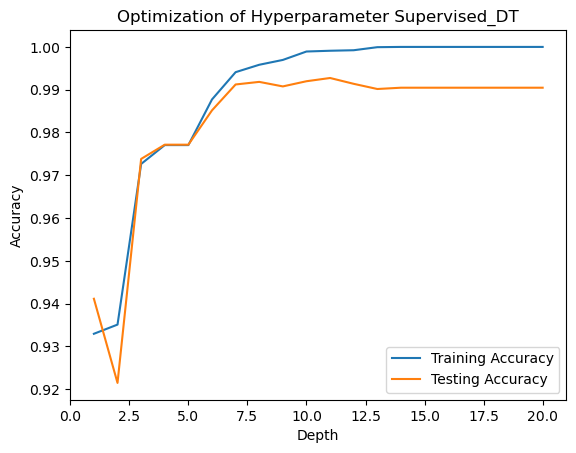

In [16]:
plt.xlim([0, 21])
plt.plot(result_df['Depth'], result_df['Training Accuracy'], label = "Training Accuracy")
plt.plot(result_df['Depth'], result_df['Testing Accuracy'], label = "Testing Accuracy")
plt.title("Optimization of Hyperparameter Supervised_DT")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()